THIS IS THE DATASET CONSISTS OF DIFFERENT ATTRIBUTE, WE HAVE TO PREDICT THE FEES OF THE DOCTOR BASED ON OTHER PARAMETERS, SO HERE WE WILL BE USING LINEAR REGRESSION.

In [1]:
#importing all the libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

EXPLORATORY DATA ANALYSIS

In [3]:
#reading the csv file

In [4]:
df=pd.read_csv('doctorfees.csv')

In [5]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
df.shape

(1199, 7)

In [7]:
#dropping the miscellaneous info from the dataset

In [8]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [9]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


In [10]:
df.shape

(1199, 6)

In [11]:
df.dtypes

Qualification    object
Experience       object
Rating           object
Place            object
Profile          object
Fees              int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  1199 non-null   object
 1   Experience     1199 non-null   object
 2   Rating         531 non-null    object
 3   Place          1192 non-null   object
 4   Profile        1199 non-null   object
 5   Fees           1199 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 56.3+ KB


In [13]:
#visualizing null values through heatmap

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

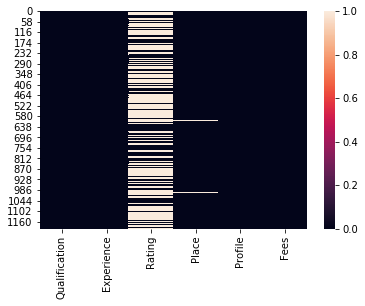

In [15]:
sns.heatmap(df.isnull())

In [16]:
#filling null values in rating column

In [17]:
df=df.fillna('none')       

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  1199 non-null   object
 1   Experience     1199 non-null   object
 2   Rating         1199 non-null   object
 3   Place          1199 non-null   object
 4   Profile        1199 non-null   object
 5   Fees           1199 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 56.3+ KB


In [19]:
df['Qualification'].value_counts()

BHMS                                                                                                                  103
BDS                                                                                                                   101
BAMS                                                                                                                   85
MBBS                                                                                                                   76
MBBS, MS - ENT                                                                                                         46
                                                                                                                     ... 
BSAM, BNYS                                                                                                              1
Diploma in Otorhinolaryngology (DLO)                                                                                    1
BDS, Certification in Ae

FEATURE ENGINEERING

In [20]:
#changing cat values to numerical values

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
a=['Qualification','Experience','Rating','Place','Profile']
for i in a:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [23]:
df.head()     #40 represents none in rating

,Qualification,Experience,Rating,Place,Profile,Fees
0,102,16,0,165,5,100
1,18,3,38,469,0,350
2,304,55,40,245,3,300
3,118,3,40,45,0,250
4,2,12,0,188,0,250


In [24]:
df['Rating'].unique()

array([ 0, 38, 40, 39, 19, 35, 37, 34, 28, 30, 20, 33,  2, 18, 27, 36, 22,
       29, 14, 26, 32, 23, 16, 25,  5, 31,  9,  6, 15, 10, 13,  8, 17,  1,
        4, 11, 24,  3,  7, 12, 21])

In [25]:
df.info()    #from the below we can now see that no null values are present in the dataset and the dtypes have changed to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Qualification  1199 non-null   int32
 1   Experience     1199 non-null   int32
 2   Rating         1199 non-null   int32
 3   Place          1199 non-null   int32
 4   Profile        1199 non-null   int32
 5   Fees           1199 non-null   int64
dtypes: int32(5), int64(1)
memory usage: 32.9 KB


In [26]:
df.skew()  #to check the skewness in data

Qualification    0.295413
Experience       0.574874
Rating          -1.813157
Place            0.104474
Profile          0.101105
Fees             0.813734
dtype: float64

In [27]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Fees
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,154.843203,22.572977,32.708090,231.090909,2.468724,302.668057
std,109.074183,18.798895,13.464162,141.423307,1.668368,187.216822
min,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,58.500000,6.000000,34.000000,109.000000,1.000000,150.000000
50%,158.000000,16.000000,40.000000,230.000000,2.000000,260.000000
75%,248.000000,38.000000,40.000000,351.500000,4.000000,450.000000
max,381.000000,55.000000,40.000000,477.000000,5.000000,950.000000


From above we can see that outliers is present in Qualification,exp,place,fees

In [28]:
#Data Visualization

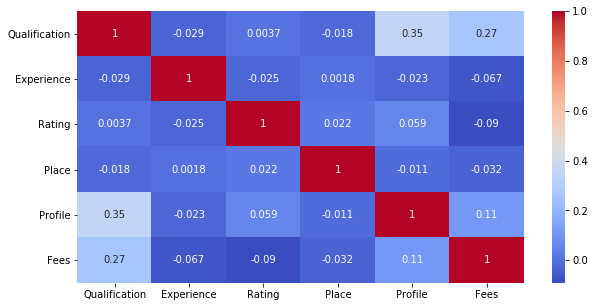

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [30]:
#we can see from the above that the values are -vely as well +vely correlated with each other

In [31]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,102,16,0,165,5,100
1,18,3,38,469,0,350
2,304,55,40,245,3,300
3,118,3,40,45,0,250
4,2,12,0,188,0,250


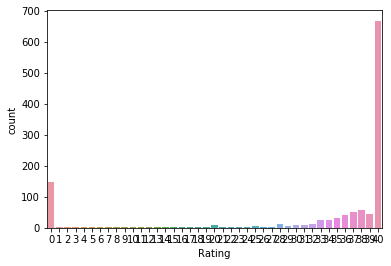

In [32]:
sns.countplot(df['Rating'])

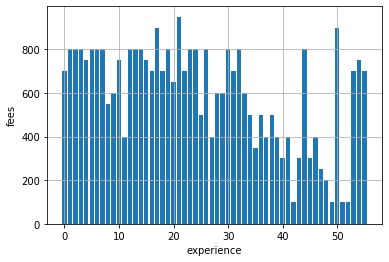

In [33]:
plt.bar(df['Experience'],df['Fees'])
plt.xlabel('experience')
plt.ylabel('fees')
plt.grid()
plt.show()

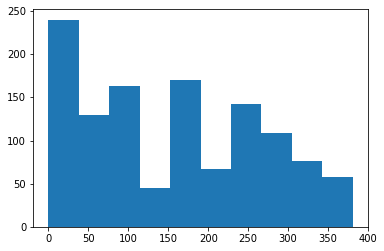

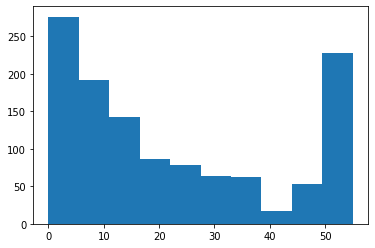

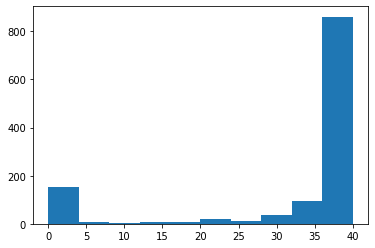

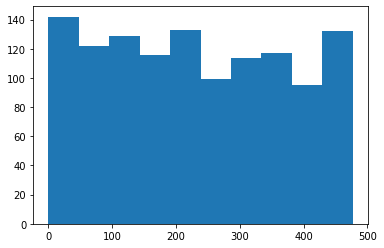

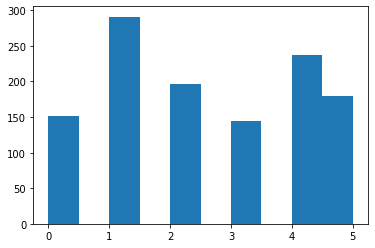

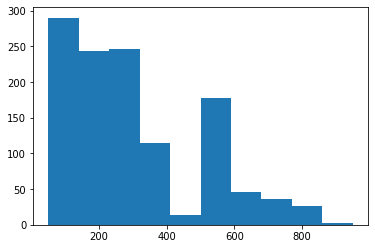

In [34]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

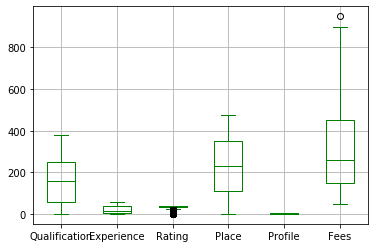

<Figure size 720x1080 with 0 Axes>

In [35]:
df.boxplot(color='green')
plt.figure(figsize=(10,15))
plt.show()                    #to check the outliers

In [36]:
#we can see fromm the above that a few outliers is present in the dataset which we will remove later

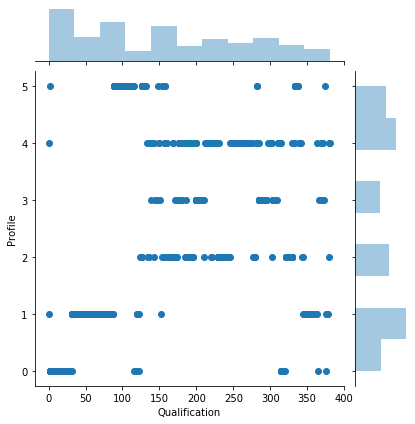

In [37]:
sns.jointplot(df["Qualification"],df["Profile"])
plt.show()

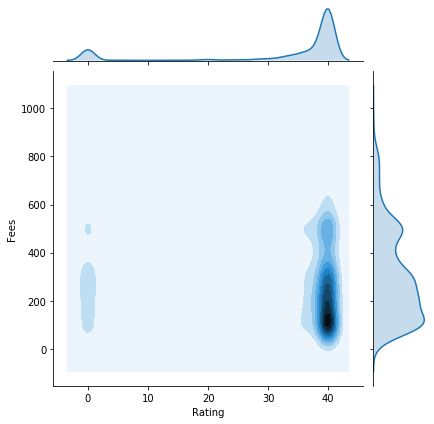

In [38]:
sns.jointplot(df["Rating"],df["Fees"],kind="kde")
plt.show()

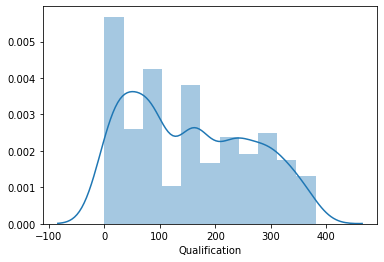

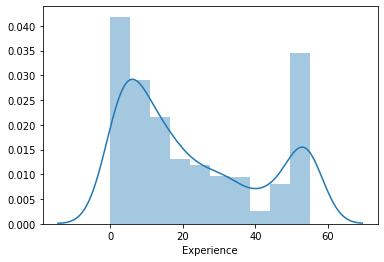

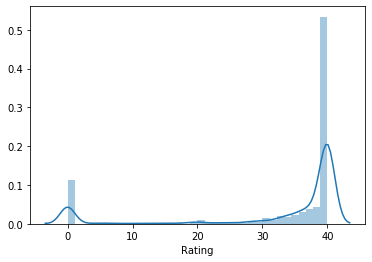

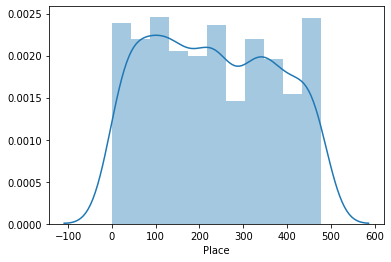

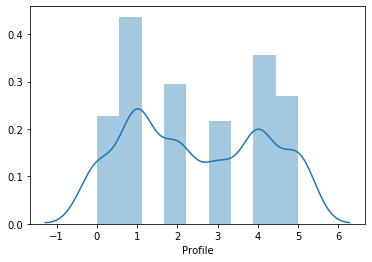

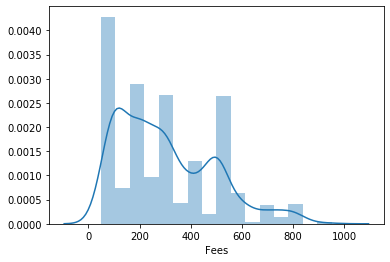

In [39]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

So from the above visualisation we can see that how various parameters are dependent on Fees as illustrated above.

In [40]:
#removing the outliers

In [41]:
from scipy.stats import zscore

In [42]:
z=np.abs(zscore(df))  

In [43]:
threshold=3
print(np.where(z>3))

(array([275, 293, 987], dtype=int64), array([5, 5, 5], dtype=int64))


In [44]:
df_new=df[(z<3).all(axis=1)]

In [45]:
df_new.shape  #this is the new shape of the data after removing the outliers

(1196, 6)

In [46]:
df.shape

(1199, 6)

In [47]:
#dividing the dataset in x and target variable(y)

In [48]:
x=df.drop('Fees',axis=1)

In [49]:
x.shape

(1199, 5)

In [50]:
x.head()

,Qualification,Experience,Rating,Place,Profile
0,102,16,0,165,5
1,18,3,38,469,0
2,304,55,40,245,3
3,118,3,40,45,0
4,2,12,0,188,0


In [51]:
y=df['Fees'].values
y=y.reshape(-1,1)

In [52]:
y.shape

(1199, 1)

In [53]:
#now with the help of linear regression we will build our model

In [54]:
#importing all required libraries

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [56]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: 0.0934507414446556
the r2 score corrosponding to the random state 43 is: 0.05818791228053166
the r2 score corrosponding to the random state 44 is: 0.037297818724715937
the r2 score corrosponding to the random state 45 is: 0.009227640515122593
the r2 score corrosponding to the random state 46 is: 0.09418449713549326
the r2 score corrosponding to the random state 47 is: 0.04905794418880072
the r2 score corrosponding to the random state 48 is: 0.07642568143464534
the r2 score corrosponding to the random state 49 is: 0.07685602592756269
the r2 score corrosponding to the random state 50 is: 0.07269041424634481
the r2 score corrosponding to the random state 51 is: 0.07046759705199779
the r2 score corrosponding to the random state 52 is: 0.049709663639732726
the r2 score corrosponding to the random state 53 is: 0.07903545867996753
the r2 score corrosponding to the random state 54 is: 0.06567118683406425
the r2 score corrosponding to the ra

In [57]:
#using regularization method

In [58]:
from sklearn.linear_model import Lasso,Ridge

In [59]:
ls=Lasso()
rg=Ridge()

In [60]:
#using grid search cv to find the best parameter

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param={'alpha':[0.1,0.01,0.001,1]}

In [63]:
gd=GridSearchCV(estimator=ls,param_grid=param)

In [64]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
gd.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
gd.best_params_

{'alpha': 0.1}

In [67]:
gd.best_score_

0.07623260249422996

In [68]:
gd1=GridSearchCV(estimator=rg,param_grid=param)

In [69]:
gd1.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
gd1.best_params_

{'alpha': 1}

In [71]:
gd1.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [72]:
gd1.best_score_

0.07623260203555401

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
score=cross_val_score(lr,x,y,cv=5) # checking the best score with cross valid score

In [75]:
score

array([0.06823371, 0.09165859, 0.08171869, 0.05411649, 0.0854344 ])

In [76]:
#checking the result with other algorithms

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [78]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98,test_size=0.20)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score -0.06634594476777744
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 158.13333333333333
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 39189.9
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.026884905552653438
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 151.22201791085774
SVR(C=1.0, cache_size

In [80]:
for i in range(1,21):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    predknn=knn.predict(x_test)
    print("accuracy score at n_neighbor",i,"is:",r2_score(y_test,predknn))

accuracy score at n_neighbor 1 is: -0.5396389545026665
accuracy score at n_neighbor 2 is: -0.106658722312168
accuracy score at n_neighbor 3 is: -0.11343910574017402
accuracy score at n_neighbor 4 is: -0.08074997339258494
accuracy score at n_neighbor 5 is: -0.06634594476777744
accuracy score at n_neighbor 6 is: -0.08103624225166794
accuracy score at n_neighbor 7 is: -0.08963471990426264
accuracy score at n_neighbor 8 is: -0.08119779992461584
accuracy score at n_neighbor 9 is: -0.04862987957163156
accuracy score at n_neighbor 10 is: -0.048517006850281374
accuracy score at n_neighbor 11 is: -0.036690641321188266
accuracy score at n_neighbor 12 is: -0.017650129317784202
accuracy score at n_neighbor 13 is: -0.013304282864699868
accuracy score at n_neighbor 14 is: -0.016959913043987696
accuracy score at n_neighbor 15 is: -0.008759409242481198
accuracy score at n_neighbor 16 is: -0.01884207488283174
accuracy score at n_neighbor 17 is: -0.021357193678027464
accuracy score at n_neighbor 18 is: 

In [81]:
#finding the best parameter for svr using gridsearch cv 

In [82]:
attr={'kernel':('rbf','linear','poly'),'C':[0,1,10]}

In [83]:
gd2=GridSearchCV(estimator=SVR(),param_grid=attr)

In [84]:
gd2.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'linear', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
gd2.best_params_

{'C': 10, 'kernel': 'rbf'}

In [86]:
gd2.best_score_

0.04021691278942356

In [87]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor   #boosting the result using ensemble technique

In [88]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [89]:
for i in model:
    a=AdaBoostRegressor(base_estimator=i,n_estimators=150,learning_rate=0.01)
    a.fit(x_train,y_train)
    predad=a.predict(x_test)
    print("r2 score for model",i,"is:",r2_score(y_test,predad))

r2 score for model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: -0.03581211144966301
r2 score for model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.035270191528103734
r2 score for model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: -0.11114265632275555


In [90]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingRegressor(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("r2 score at lerning rate",i,"is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.1 is: 0.1022571243855247
r2 score at lerning rate 0.01 is: 0.11442860766291607
r2 score at lerning rate 1.0 is: -0.6015635582279235


In [91]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestRegressor(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('r2 score at',i,'is:',r2_score(y_test,predrd))

r2 score at 150 is: 0.06054294048097231
r2 score at 200 is: 0.0766547886839023
r2 score at 250 is: 0.06918156079196502
r2 score at 300 is: 0.06162751834056879
r2 score at 350 is: 0.0734119383070937


In [92]:
#so from the above we can see that we are only able to achieve a maximum of 11.44% accuracy and that with Gradient boost model

In [93]:
#so finalizing the model

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98,test_size=0.20)

In [100]:
gd=GradientBoostingRegressor(learning_rate=0.01)
gd.fit(x_train,y_train)
predgd=gd.predict(x_test)
a1=pd.DataFrame(data=predgd)
a1.to_csv('predgd_fees.csv')   #saving in to csv form
print("r2 score at lerning rate 0.01 is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.01 is: 0.11442860766291607


In [101]:
#dumping the final model

In [102]:
from sklearn.externals import joblib

In [104]:
joblib.dump(gd,'doctor_fees')

['doctor_fees']